<a href="https://colab.research.google.com/github/vinihora/portfolio_data_science/blob/main/projects/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Rio de Janeiro

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1")

## Análise dos Dados


**Dicionário das variáveis**

* id - número índice do imóvel
* name - Nome do imóvel
* host_id - id do hospedeiro
* host_name - nome do hospedeiro
* neighbourdhood_group - não tem nenhum valor válido
* neighbourhood - bairro do imóvel
* latitude - latitude do imóvel
* longitude - longitude do imóvel
* room_type - tipo de reserva do imóvel
* price - preço da diária
* minimun_nights - número minimo de dias a ser reservado
* number_of_reviews - número de avaliações
* last_review - Data do último review
* reviews_per_month - Média de avaliações por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo hospedeiro
* availability_365 - dias vagos no ano

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,190,5,260,2021-02-08,1.98,1,343
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,311,3,85,2018-02-14,0.66,1,73
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,267,2,181,2020-03-15,1.98,1,272
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,359,2021-04-21,2.79,1,139
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.98102,-43.19172,Entire home/apt,493,3,18,2016-02-09,0.18,2,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
df.shape

print(f'N° de observações: {df.shape[0]}')
print(f'N° de variáveis: {df.shape[1]}')

# verificar as 5 primeiras entradas do dataset

display(df.dtypes)

N° de observações: 26467
N° de variáveis: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

- Neste caso podemos observar que a coluna ``` neighbourhood_group ``` não possui nenhum valor
- As colunas ``` last_review, reviews_per_month, host_name, name ``` também possuem valores ausentes
- Para o restante das colunas, não foi encontrado nenhum valor faltante


In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
last_review                       0.371179
reviews_per_month                 0.371179
host_name                         0.032380
name                              0.001096
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

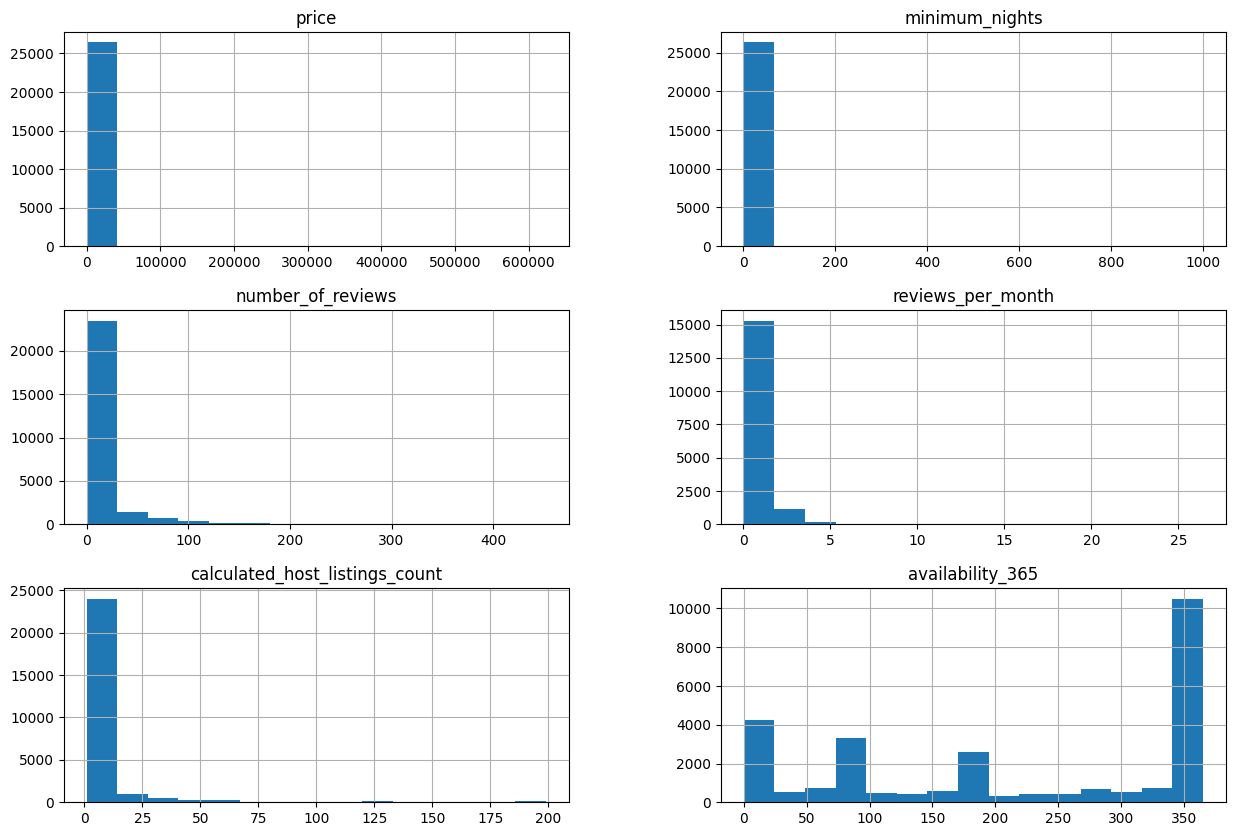

In [6]:
# plotar o histograma das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].hist(bins=15, figsize=(15,10));

- Só foram plotados os gráficos das colunas que possuem valores possíveis de serem interpretados por uma distribuição.

Agora, analisaremos caso a caso:

- ``` price ``` - O gráfico de distribuição não está bem apresentado, o que é um forte indício de possuir outliers

- O mesmo ocorre para as colunas ``` minimum_nights, number_of_reviews, reviews_per_month e calculated_host_listings_count ```

- Já para a coluna ``` availability_365 ``` temos uma distribuição melhor apresentada

- A seguir, será realizado um aprofundamento em casa uma das colunas com problemas na distribuição a fim de encontrar os valores que inibam o efeito dos outliers, a fim de retirá-los do DataFrame

% de valores acima de 1500: 6.698908074205614


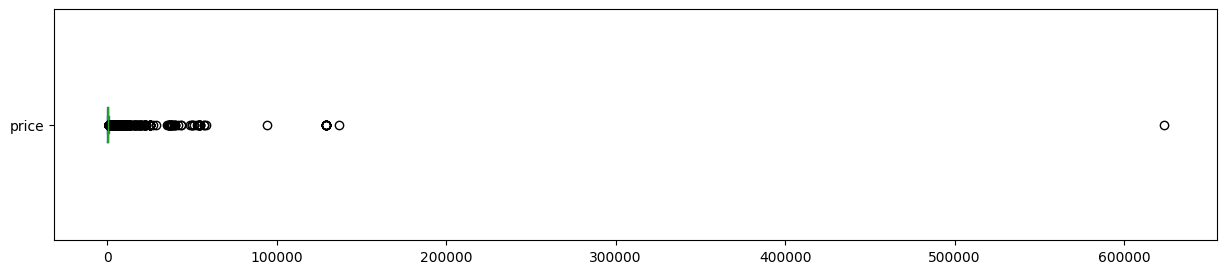

In [7]:
df.price.plot(kind='box', vert=False, figsize=(15,3));

print(f"% de valores acima de 1500: {(len(df[df['price'] > 1500]) / df.shape[0]) * 100}")

% de valores acima de 15: 3.215324744020856


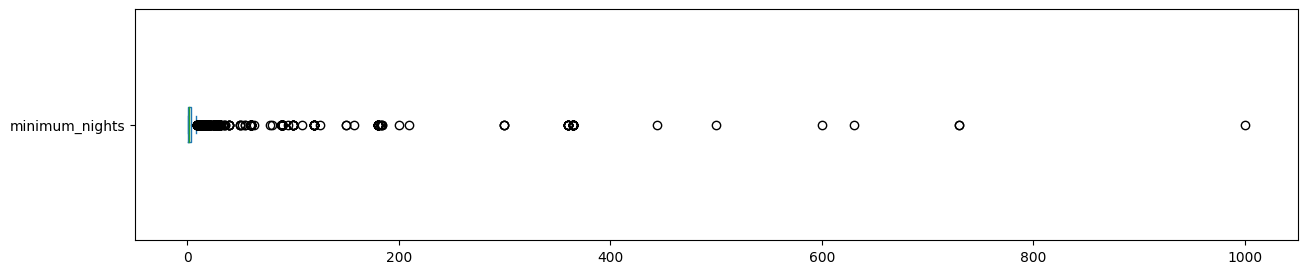

In [8]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

print(f"% de valores acima de 15: {(len(df[df['minimum_nights'] > 15]) / df.shape[0]) * 100}")

% de valores acima de 50: 6.955831790531605


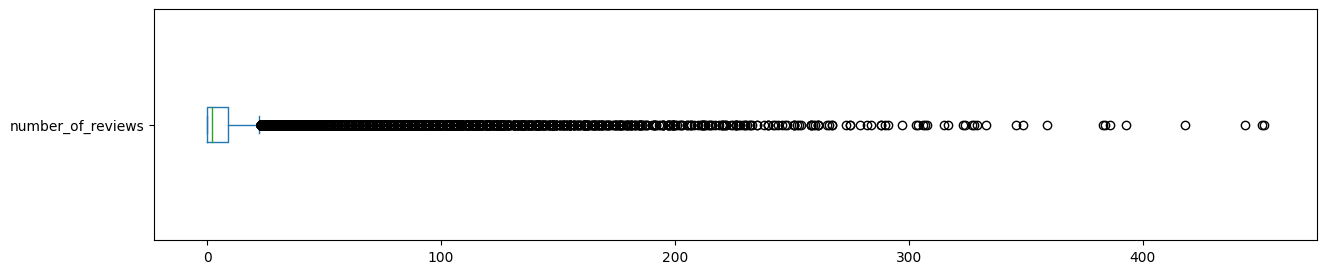

In [9]:
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))

print(f"% de valores acima de 50: {(len(df[df['number_of_reviews'] > 50]) / df.shape[0]) * 100}")

% de valores acima de 3: 1.2090527827105453


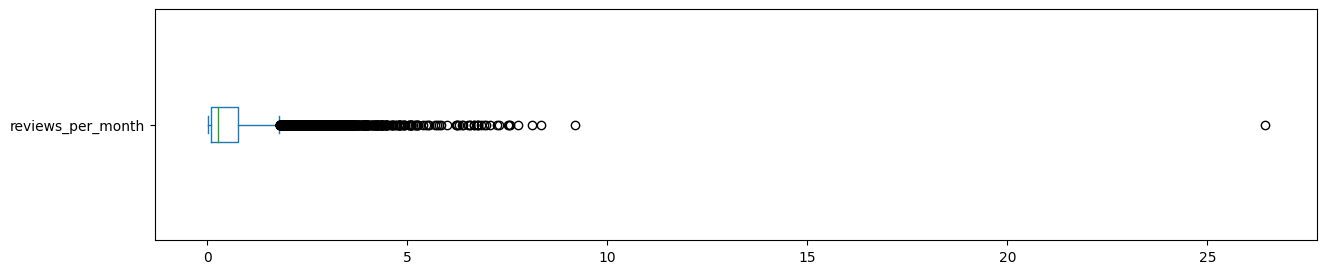

In [10]:
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))

print(f"% de valores acima de 3: {(len(df[df['reviews_per_month'] > 3]) / df.shape[0]) * 100}")

% de valores acima de 20: 6.808478482638758


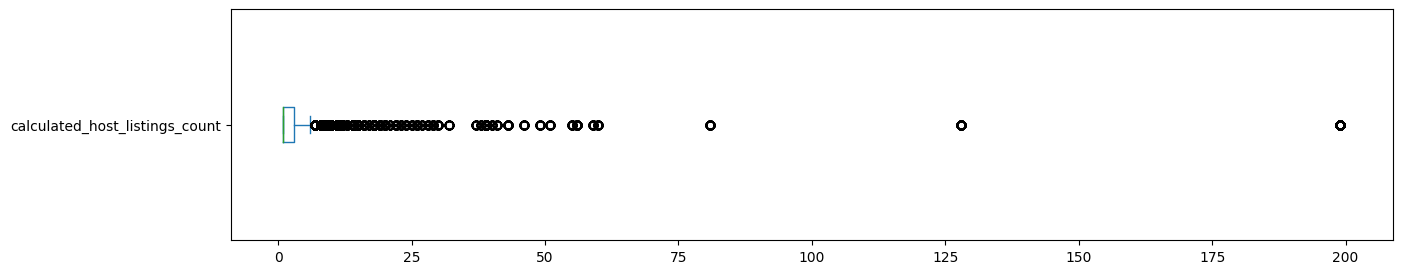

In [11]:
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))

print(f"% de valores acima de 20: {(len(df[df['calculated_host_listings_count'] > 20]) / df.shape[0]) * 100}")

In [12]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean['price'] >= 1500].index, inplace=True, axis=0 )
df_clean.drop(df_clean[df_clean['minimum_nights'] >= 15].index, inplace=True, axis=0 )
df_clean.drop(df_clean[df_clean['number_of_reviews'] >= 50].index, inplace=True, axis=0 )
df_clean.drop(df_clean[df_clean['reviews_per_month'] >= 3].index, inplace=True, axis=0 )
df_clean.drop(df_clean[df_clean['calculated_host_listings_count'] >= 20].index, inplace=True, axis=0 )
df_clean.drop(['neighbourhood_group'], axis=1, inplace=True)

print(df_clean.shape)
print(df.shape)

(19978, 15)
(26467, 16)


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

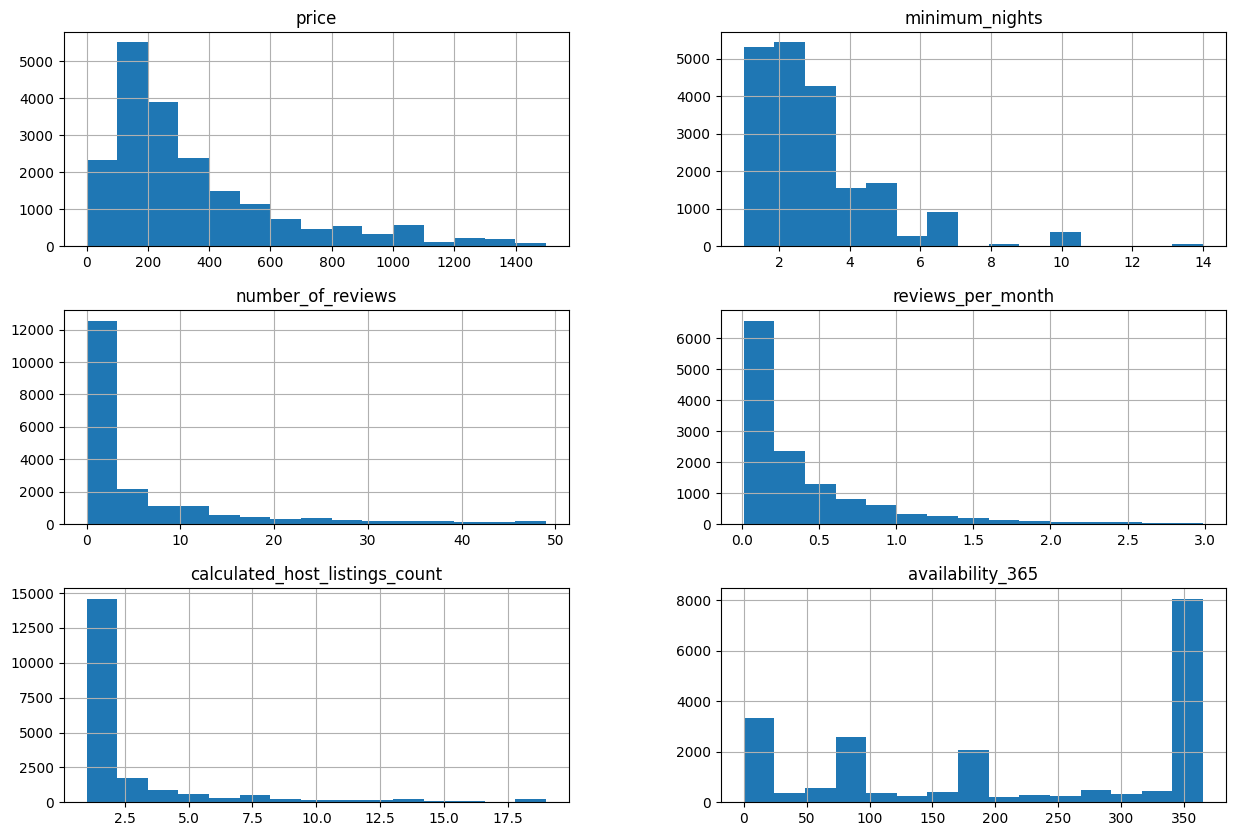

In [13]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].hist(bins=15, figsize=(15,10))

- Após limpeza dos outliers, podemos observar historiogramas muito mais bem definidos e podemos analisar de maneira mais clara o formato e distribuição dos dados.
- Além disso, agora é possível extrair e analisar informações através do boxplot de maneira mais fácil, veja a seguir:

<Axes: >

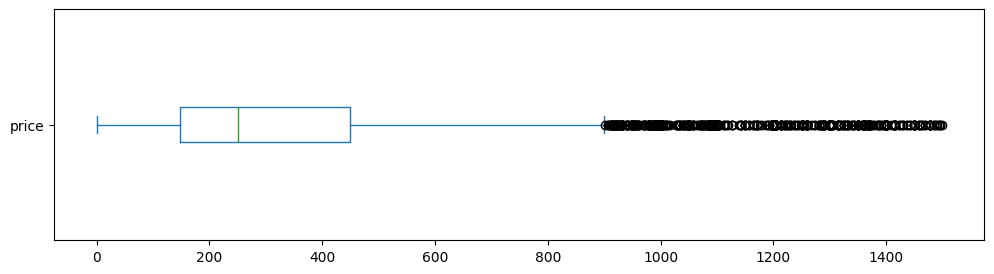

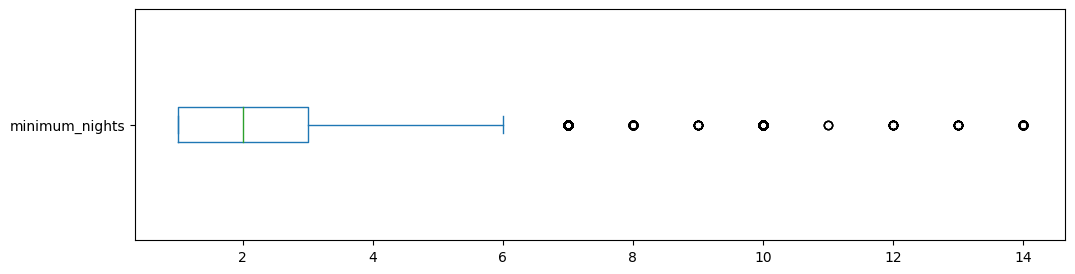

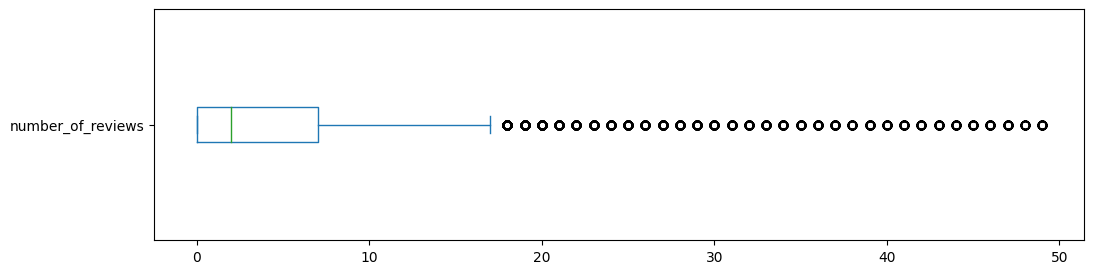

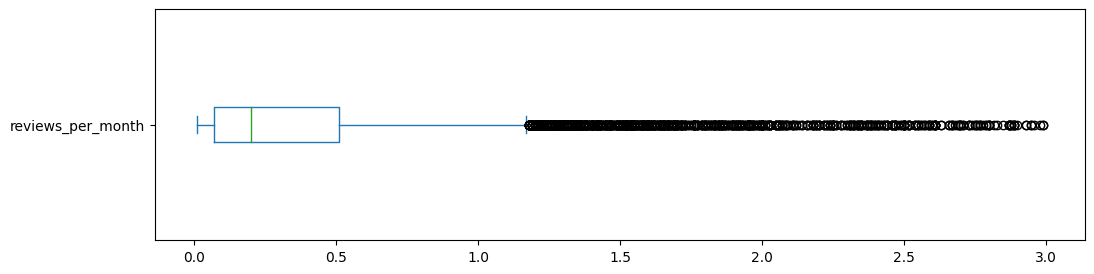

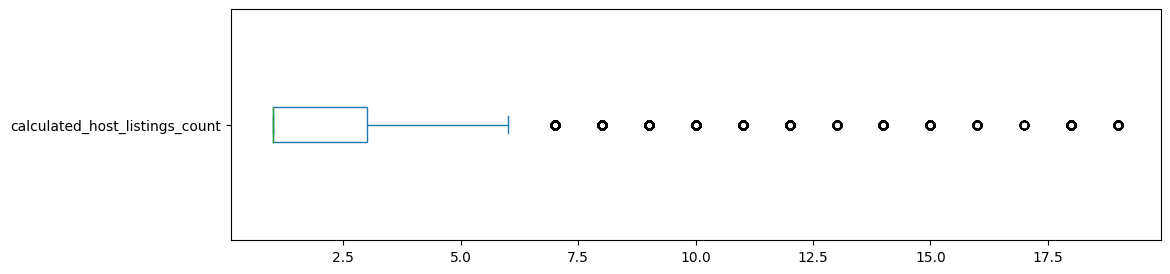

In [28]:
df_clean[['price']].plot(kind='box', vert=False, figsize=(12,3))
df_clean[['minimum_nights']].plot(kind='box', vert=False, figsize=(12,3))
df_clean[['number_of_reviews']].plot(kind='box', vert=False, figsize=(12,3))
df_clean[['reviews_per_month']].plot(kind='box', vert=False, figsize=(12,3))
df_clean[['calculated_host_listings_count']].plot(kind='box', vert=False, figsize=(12,3))

### **Q4. Qual a média dos preços de aluguel?**

In [14]:
# ver a média da coluna `price``

df_clean['price'].mean()


342.26864551006105

### **Q4. Qual a correlação existente entre as variáveis**

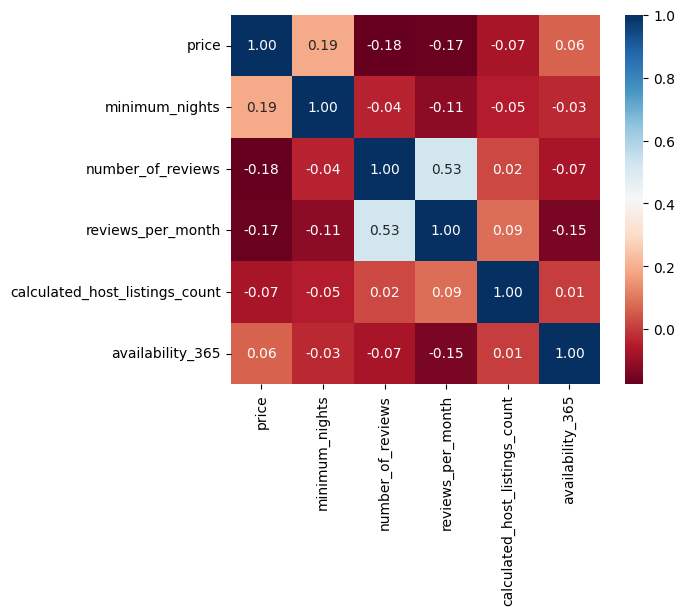

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

- Podemos observar que as únicas correlações relevantes nos dados estão entre as variáveis ``` reviews_per_month e number_of_reviews ```, o que faz total sentido, visto que as avaliações por mês é uma média do número total de avaliações.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    13415
Private room        5924
Shared room          572
Hotel room            67
Name: room_type, dtype: int64

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível


for i in df_clean['room_type'].unique():
  print(f"porcentagem (%) de {i} : {((df_clean.loc[df_clean.room_type == i].shape[0])/df_clean.shape[0])*100}%")



porcentagem (%) de Entire home/apt : 67.14886375012514%
porcentagem (%) de Private room : 29.652617879667638%
porcentagem (%) de Shared room : 2.863149464410852%
porcentagem (%) de Hotel room : 0.335368905796376%


### **Q6. Qual a localidade mais cara do dataset?**



In [18]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Caju              1325.000000
Anchieta           800.000000
Realengo           768.000000
Grumari            726.500000
Paciência          626.666667
                     ...     
Mangueira           73.800000
Honório Gurgel      70.500000
Vila Kosmos         64.000000
Vigário Geral       59.000000
Vista Alegre        50.000000
Name: price, Length: 153, dtype: float64

O bairro mais caro, em média, é o de Caju

<Axes: xlabel='longitude', ylabel='latitude'>

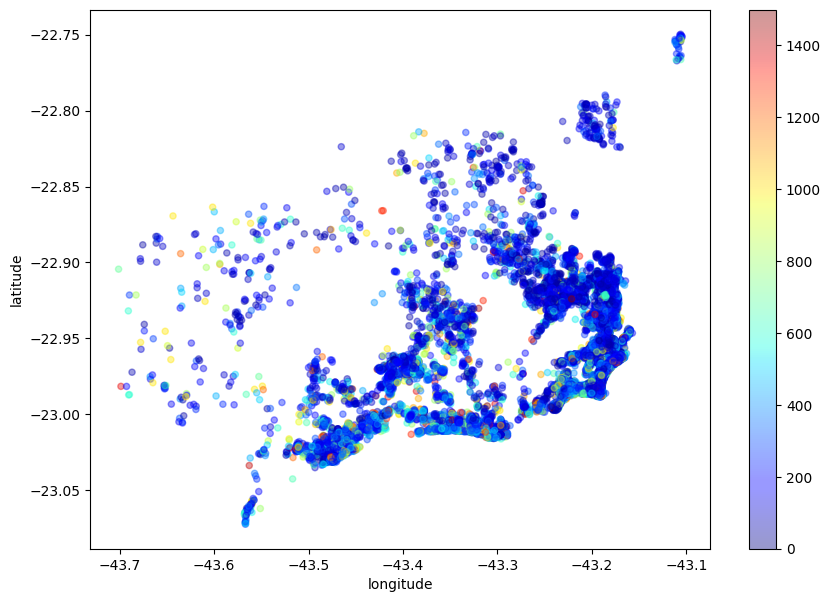

In [19]:
# plotar os imóveis pela latitude-longitude
df_clean.plot.scatter(x='longitude', y='latitude', c=df_clean['price'], cmap=plt.get_cmap('jet'), alpha=0.4, figsize=(10,7))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [20]:
# ver a média da coluna `minimum_nights``

df_clean.minimum_nights.mean()

2.8569926919611572

## Conclusões


Podemos perceber que existem algumas variáveis que possuem grande parte das observações com valores nulos, principalmente quando se trata do número de avaliações (last_review e reviews_per_month).

Além disso, a partir da observação dos gráficos de distribuição e histograma, foi possível descobrir um grande número de outliers nos dados. A partir disso, foram realizados os tratamentos dos dados a fim de não comprometer toda a análise, e estes foram retirados do dataframe.

Não só, a partir da matriz de correlação pode-se observer um baixo nível de correlação entre as variáveis contínuas, a não ser pelas duas variaveis que estão relacionadas ao número de avaliações dos imóveis.

Podemos perceber também que a maior parte dos alugueis ocorrem de maneira integral, seguida pelos quartos privados.

Já pelo gráfico de distribuição, não podemos estabelecer um padrão para o preço de reserva dos imóveis. Contudo, podemos perceber uma maior concentração de imóveis na região sul do Rio de Janeiro.